author: Songyang Cheng

date: 1025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
%matplotlib inline

## Pedestrian Count Distribution on Weekday/Weekends

In [2]:
pedestrian = pd.read_csv('Upper_State_St._Pedestrian_Counts.csv')

In [3]:
from time import time,localtime,strftime

In [4]:
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'Hour']
pedestrian = pedestrian.join(names)
pedestrian["date"] = pd.to_datetime(pedestrian["date"])
pedestrian["day_of_week"] = pedestrian["date"].dt.weekday_name
pedestrian["day_of_week"].value_counts()

Monday       1272
Friday       1272
Wednesday    1248
Sunday       1248
Tuesday      1248
Thursday     1247
Saturday     1224
Name: day_of_week, dtype: int64

In [5]:
ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
                     (pedestrian['day_of_week'] == 'Tuesday')|
                     (pedestrian['day_of_week'] == 'Wednesday')|
                     (pedestrian['day_of_week'] == 'Thursday') ]
ped_fri = pedestrian[(pedestrian['day_of_week'] == 'Friday')]
ped_sat = pedestrian[(pedestrian['day_of_week'] == 'Saturday')]
ped_sun = pedestrian[(pedestrian['day_of_week'] == 'Sunday')]

In [6]:
def box_plot(df, col_num, title, xlab, ylab, ylim = (0,2000)):
    ax = plt.subplots()[1]
    for i in range(col_num): 
        col = df.columns[i]
        x = i + 1
        y = df[col].quantile(0.5)
        ax.plot(x, y, 'ro')

        # 0.75 to 1 
        y1 = df[col].quantile(0.75)
        y2 = df[col].quantile(1)
        ax.plot((x,x), (y1,y2), 'k')

        # 0.25 to 0 
        y1 = df[col].quantile(0.25)
        y2 = df[col].quantile(0)
        ax.plot((x,x), (y1,y2), 'k')

    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels([])
    ax.set_xticks(range(1, len(df.columns)+1))
    ax.set_xlim(0.5, len(df.columns)+0.5)
    ax.set_ylim(ylim)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    
    return ax

In [7]:
def column_concat_df(wkd, fri, sat, sun, col_name):
    df = pd.concat([wkd[col_name].reset_index(drop=True), 
                    fri[col_name].reset_index(drop=True),
                    sat[col_name].reset_index(drop=True),
                    sun[col_name].reset_index(drop=True)], 
                     axis=1)
    df.columns = ["Weekday", "Friday", "Saturday", "Sunday"]
    return df

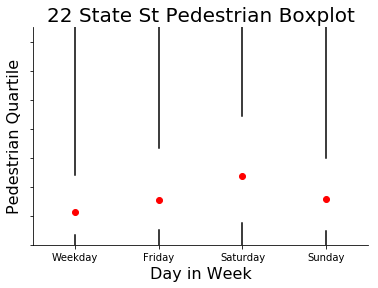

In [8]:
State_22 = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "SS_22_State_St__North_Side")
box_plot(State_22, 4, "22 State St Pedestrian Boxplot", "Day in Week", "Pedestrian Quartile", (0,750))

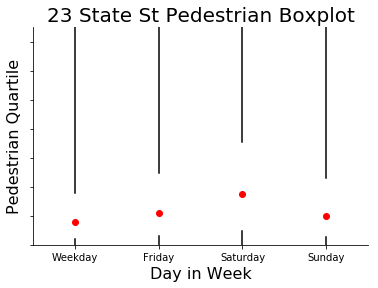

In [9]:
State_23 = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "SS_23_State_St__South_Side")
box_plot(State_23, 4, "23 State St Pedestrian Boxplot", "Day in Week", "Pedestrian Quartile", (0,750))

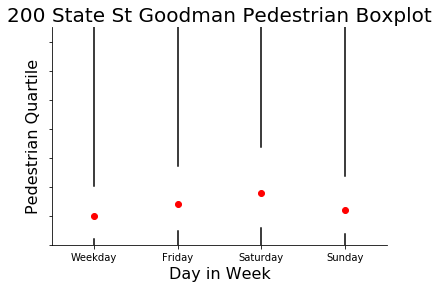

In [10]:
Goodman = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "F200_State_St____Goodman_s")
box_plot(Goodman, 4, "200 State St Goodman Pedestrian Boxplot", "Day in Week", "Pedestrian Quartile", (0,750))

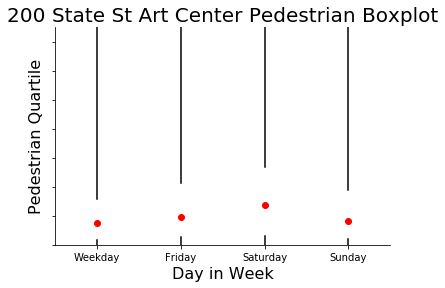

In [11]:
art_center = column_concat_df(ped_wkd, ped_fri, ped_sat, ped_sun, "F200_State_St____Art_Center")
box_plot(art_center, 4, "200 State St Art Center Pedestrian Boxplot", "Day in Week", "Pedestrian Quartile", (0,750))

Group by different day in a week, the volume of Pedestrian does not vary too much, because we can see the 3rd quantile is not too much far away from 1st quantile.

Also, it seems that Friday has roughly the same pattern as Sunday.

## Pedestrian Counter Positions

In [12]:
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close

In [13]:
import gmaps
gmaps.configure(api_key=api_key)

In [14]:
position = pd.DataFrame({
    "no": [1, 2, 6, 10, 9, 11],
    "location": ["SS-22 State St. North Side", "SS-23 State St. South Side", 
                "200 State St. - Goodman's", "200 State St. - Art Center",
                "344 State St.", "341 State St."],
    "longitude": [43.074837, 43.074676, 43.074889, 43.074709, 43.074905, 43.074716],
    "latitude": [-89.387365, -89.387720, -89.388927, -89.389280, -89.391291, -89.391441],
    "loc":[(43.074837,-89.387365), (43.074676,-89.387720), (43.074889,-89.388927),
          (43.074709,-89.389280), (43.074905,-89.391291), (43.074716,-89.391441)]
})
position

,no,location,longitude,latitude,loc
0,1,SS-22 State St. North Side,43.074837,-89.387365,"(43.074837, -89.387365)"
1,2,SS-23 State St. South Side,43.074676,-89.387720,"(43.074676, -89.38772)"
2,6,200 State St. - Goodman's,43.074889,-89.388927,"(43.074889, -89.388927)"
3,10,200 State St. - Art Center,43.074709,-89.389280,"(43.074709, -89.38928)"
4,9,344 State St.,43.074905,-89.391291,"(43.074905, -89.391291)"
5,11,341 State St.,43.074716,-89.391441,"(43.074716, -89.391441)"


In [15]:
intersection = pd.DataFrame({
    "location": ["State and Dayton", "State and Gorham", "State and Johnson"],
    "loc":[(43.074739,-89.388009), (43.074783,-89.391701), (43.074774,-89.389964)]
})
ped_count_symbol = [
{'no': '1', 'location': (43.074837,-89.387365), 'location': "SS-22 State St. North Side"},
{'no': '2', 'location': (43.074676,-89.387720), 'location': "SS-23 State St. South Side"},
{'no': '6', 'location': (43.074889,-89.388927), 'location': "200 State St. - Goodman's"},
{'no': '10', 'location': (43.074709,-89.389280), 'location': "200 State St. - Art Center"},
{'no': '9', 'location': (43.074905,-89.391291), 'location': "344 State St."},
{'no': '11', 'location': (43.074716,-89.391441), 'location': "341 State St."}
]

In [16]:
#Set up your map
fig = gmaps.figure()

info_box_template = \
"""
<dl>
<dt>NO.</dt><dd>{no}</dd>
<dt>Location</dt><dd>{location}</dd>
</dl>
"""
counter_info = [info_box_template.format(**p) for p in ped_count_symbol]
ped_counter = gmaps.marker_layer(position["loc"], info_box_content=counter_info)

intersect_layer = gmaps.symbol_layer(
intersection["loc"], fill_color='rgba(53, 227, 181, 1)',
stroke_color='rgba(53, 227, 181, 1)', scale=6
)

fig.add_layer(ped_counter)
fig.add_layer(intersect_layer)
fig

Figure(layout=FigureLayout(height='420px'))

It implies how I should link the data of pedestrian and traffic light. 
I will combine 
SS-22/SS-23 State St pedestrian data with Dayton/State traffic light data; 200 State St Art Center/Goodman pedestrian data with Johnson/State traffic light data; 341/344 State St data with Gorham/State traffic light data.

## Relationship Across Time between Traffic Light Cycle and Pedestrian Volume 

In [17]:
programs = pd.read_excel('te_cycle_data.xlsx', sheet_name='Programs')
patterns = pd.read_excel('te_cycle_data.xlsx', sheet_name='Patterns')

In [18]:
programs['Pattern'] = programs['Pattern'].replace('Flash', 0)
programs['Pattern'].astype('int64')
programs['Pattern'].head()

0    0
1    6
2    3
3    1
4    5
Name: Pattern, dtype: int64

In [19]:
combined = pd.merge(programs, patterns, on=['Intersection', 'Pattern'], how="left")
Dayton = combined[combined['Intersection'] == 'State and Dayton']
Gorham = combined[combined['Intersection'] == 'State and Gorham']
Johnson = combined[combined['Intersection'] == 'State and Johnson']

In [20]:
Dayton_weekday = Dayton[Dayton['Day Type'] == 'Monday - Thursday']
Dayton_fri = Dayton[Dayton['Day Type'] == 'Friday']
Dayton_sat = Dayton[Dayton['Day Type'] == 'Saturday']
Dayton_sun = Dayton[Dayton['Day Type'] == 'Sunday']

Johnson_wkd = Johnson[Johnson['Day Type'] == 'Monday - Thursday']
Johnson_fri = Johnson[Johnson['Day Type'] == 'Friday']
Johnson_sat = Johnson[Johnson['Day Type'] == 'Saturday']
Johnson_sun = Johnson[Johnson['Day Type'] == 'Sunday']

Gorham_wkd = Gorham[Gorham['Day Type'] == 'Monday - Thursday']
Gorham_fri = Gorham[Gorham['Day Type'] == 'Friday']
Gorham_sat = Gorham[Gorham['Day Type'] == 'Saturday']
Gorham_sun = Gorham[Gorham['Day Type'] == 'Sunday']

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
# If the number of seconds elapsed is divisible by 1800 (30 minutes), that number will be used as one of the ticks.
# xticks = [x for x in range(60 * 60 * 24 + 30) if x % 1800 == 0]
xticks = [x for x in range(60 * 60 * 24 + 30) if x % 3600 == 0]
xticklabels = [str(dt.timedelta(seconds=x)) for x in xticks]

In [23]:
def preprocess_ped_lights(ped_, street1, street2, lights_):
    # calculate all pedestrian in the specific street area group by time
    s1 = ped_.groupby(ped_.Hour)[street1].median()
    s2 = ped_.groupby(ped_.Hour)[street2].median()
    ped_total = s1 + s2
    
    # preprocess time 
    modify = lights_['Start Time'].copy()
    modify.reset_index(inplace=True, drop=True)
    modify[len(modify)] =  dt.time(23,59,59)
    
    # Rather than plotting the dt.time() on the x-axis, it could be easier to plot the number of seconds that have elapsed in the day. 
    # Below we use a list comprehension to convert the times into the number of seconds elapsed.
    seconds = [(x.hour * 3600 + x.minute * 60 + x.second) for x in modify]
    main = pd.concat([pd.Series([lights_['Main Street Green (s)'].iloc[-1]]), lights_['Main Street Green (s)']])
    cross = pd.concat([pd.Series([lights_['Cross Street Green (s)'].iloc[-1]]), lights_['Cross Street Green (s)']])
    
    return ped_total, seconds, main, cross

In [24]:
# credit to ImportanceOfBeingErnest@overstackflow
# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
def annot_max(x,y, ax=None):
    maxIxVal = np.argmax(y);
    zeroBasedIx = np.argwhere(y.index==maxIxVal).flatten()[0];
    xmax = x[zeroBasedIx];
    ymax = y.max()
    text = "x={:s}, count={:.2f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="-",connectionstyle="arc3,rad=0.1")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.98,0.99), **kw)

In [25]:
# bigger arrow
# credit to daronjp@stackoverflow 
# https://stackoverflow.com/questions/58070901/bar-plot-with-24-hours-in-the-x-axis-with-date-time-data-of-only-the-beginning-o
def lights_ped(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))
    
    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=2, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Yellow Flashing", ha="center", va="center", rotation=0,
            size=12, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

In [26]:
# Smaller arrow
def lights_ped2(timeline, main_gree, cross_green, title1, ped_count, title2, 
              street1_lab="Main Street green lights", street2_lab="State Street green lights", 
               arw_x=0.17, arw_y=0.14, size=12, lw=1, flash=True):
    fig, ax = plt.subplots(figsize=(10,5))

    bar_start = 0
    for ix, (second, main_green, cross_green) in enumerate(zip(timeline, main_gree, cross_green)):
        width = second - bar_start
        ax.bar(bar_start, main_green, width=width, align='edge', color='springgreen', edgecolor='whitesmoke', 
               label=street1_lab if ix == 0 else "_nolegend_")
        ax.bar(bar_start, cross_green, width=width, bottom=main_green, 
               align='edge', color = 'turquoise', edgecolor='whitesmoke', label=street2_lab if ix == 0 else "_nolegend_")
        bar_start += width

    if flash:
        bbox_props = dict(boxstyle="darrow,pad=0.3",lw=1, facecolor="yellow", ec="black")
        txt = ax.text(arw_x, arw_y, "Flash", ha="center", va="center", rotation=0,
            size=size, bbox=bbox_props, transform = ax.transAxes)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels, rotation=90)
    ax.set_title(title1, fontsize=20)
    ax.set_xlabel("Hour in Day", fontsize=16)
    ax.set_ylabel("Time for Green (sec)", fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc=[1.02, 0.8])
    plt.show()

    fig2 = plt.figure(figsize=(9.5, 5))
    ax2 = fig2.add_subplot(211)
    lines = ax2.plot(ped_count.index, ped_count.values)
    ax2.set_title(title2, fontsize=20)
    ax2.set_xticklabels(ped_count.index, rotation=90)
    ax2.set_xlabel("Hour in Day", fontsize=16)
    ax2.set_ylabel("Pedestrain Count", fontsize=16)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    annot_max(ped_count.index, ped_count,ax2)

In [27]:
# ped_wkd = pedestrian[(pedestrian['day_of_week'] == 'Monday')|
#                      (pedestrian['day_of_week'] == 'Tuesday')|
#                      (pedestrian['day_of_week'] == 'Wednesday')|
#                      (pedestrian['day_of_week'] == 'Thursday') ]
# ped_fri = pedestrian[pedestrian['day_of_week'] == 'Friday']
# ped_sat = pedestrian[pedestrian['day_of_week'] == 'Saturday']
# ped_sun = pedestrian[pedestrian['day_of_week'] == 'Sunday']

### Dayton/State St

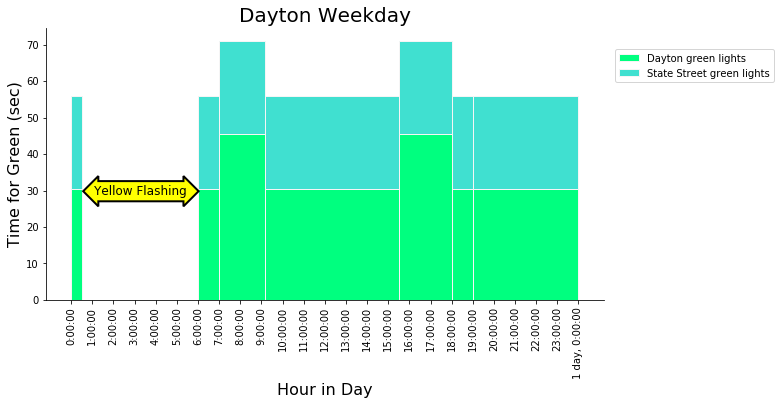

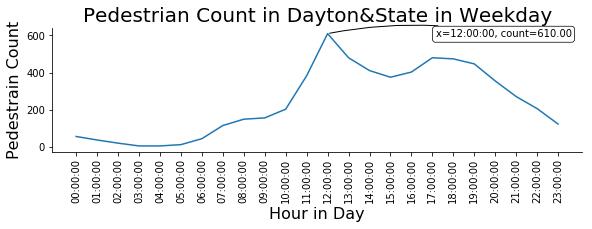

In [28]:
dayton_wkd_total, dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_weekday)
lights_ped(dayton_wkd_seconds, modify_Dayton_green_main_wkd, modify_Dayton_green_cross_wkd, "Dayton Weekday",
           dayton_wkd_total, "Pedestrian Count in Dayton&State in Weekday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

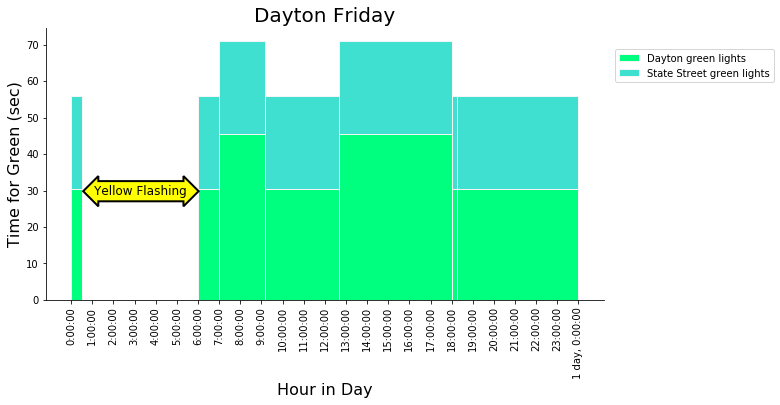

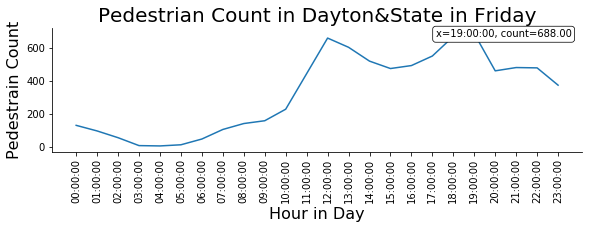

In [29]:
dayton_fri_total, dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_fri)
lights_ped(dayton_fri_seconds, modify_Dayton_green_main_fri, modify_Dayton_green_cross_fri, "Dayton Friday",
           dayton_fri_total, "Pedestrian Count in Dayton&State in Friday", 
          "Dayton green lights", "State Street green lights", 0.17, 0.4)

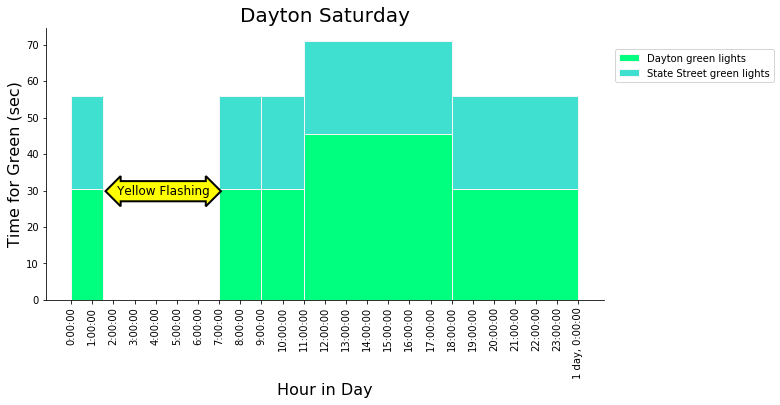

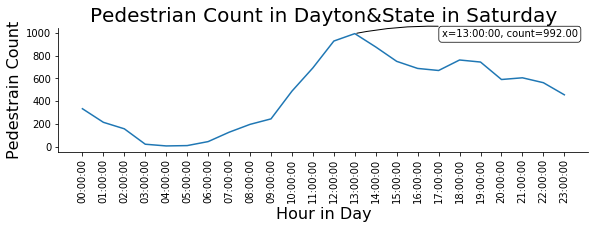

In [30]:
dayton_sat_total, dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sat)

lights_ped(dayton_sat_seconds, modify_Dayton_green_main_sat, modify_Dayton_green_cross_sat, "Dayton Saturday",
           dayton_sat_total, "Pedestrian Count in Dayton&State in Saturday", 
          "Dayton green lights", "State Street green lights", 0.21, 0.4)

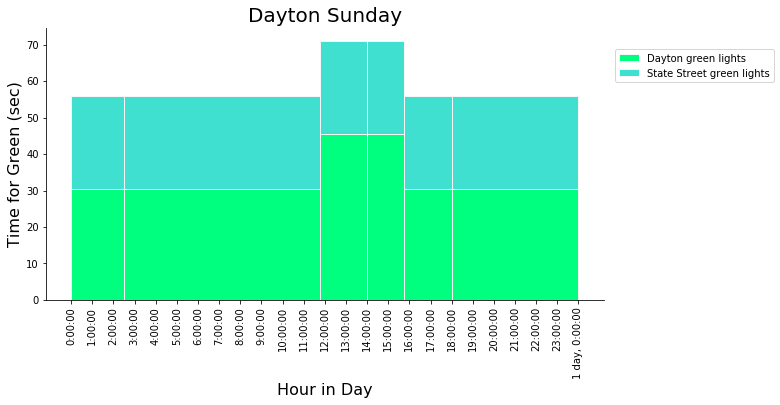

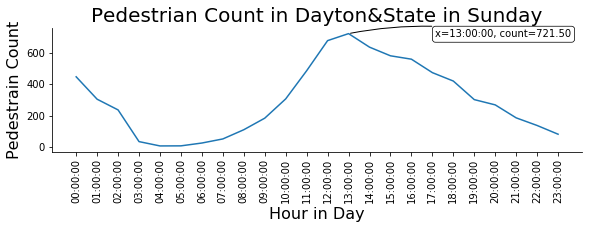

In [31]:
dayton_sun_total, dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "SS_22_State_St__North_Side", "SS_23_State_St__South_Side", Dayton_sun)

lights_ped(dayton_sun_seconds, modify_Dayton_green_main_sun, modify_Dayton_green_cross_sun, "Dayton Sunday",
           dayton_sun_total, "Pedestrian Count in Dayton&State in Sunday", 
          "Dayton green lights", "State Street green lights", -1, -1, False)

### Johnson/State St

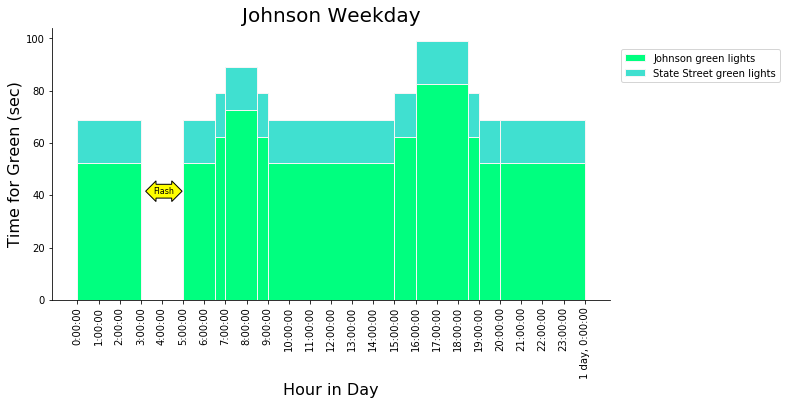

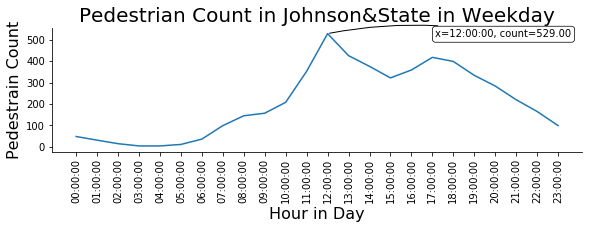

In [32]:
johnson_wkd_total, johnson_wkd_seconds, modify_johnson_green_main_wkd, modify_johnson_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_wkd)

lights_ped2(johnson_wkd_seconds, modify_johnson_green_main_wkd, modify_johnson_green_cross_wkd, "Johnson Weekday",
           johnson_wkd_total, "Pedestrian Count in Johnson&State in Weekday", 
          "Johnson green lights", "State Street green lights", 0.2, 0.4, size=8)

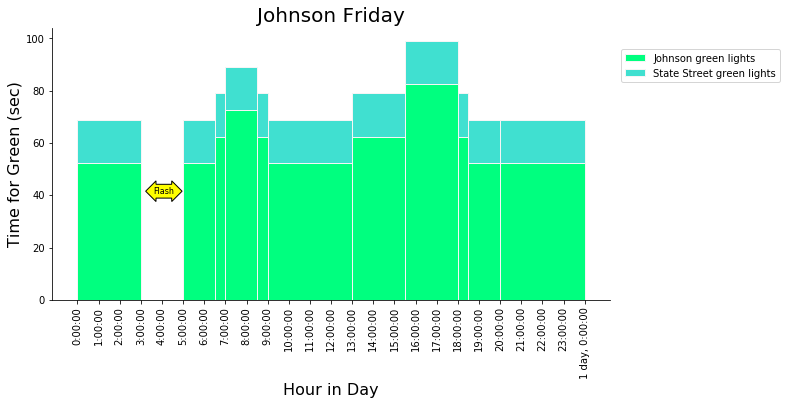

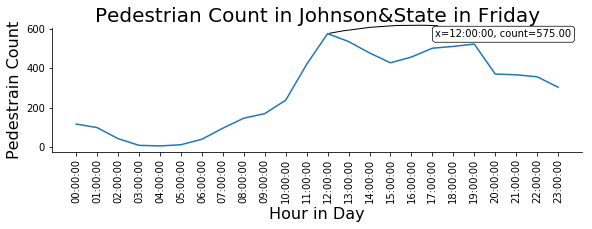

In [33]:
johnson_fri_total, johnson_fri_seconds, modify_johnson_green_main_fri, modify_johnson_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_fri)

lights_ped2(johnson_fri_seconds, modify_johnson_green_main_fri, modify_johnson_green_cross_fri, "Johnson Friday",
           johnson_fri_total, "Pedestrian Count in Johnson&State in Friday", 
          "Johnson green lights", "State Street green lights", 0.2, 0.4, 8)

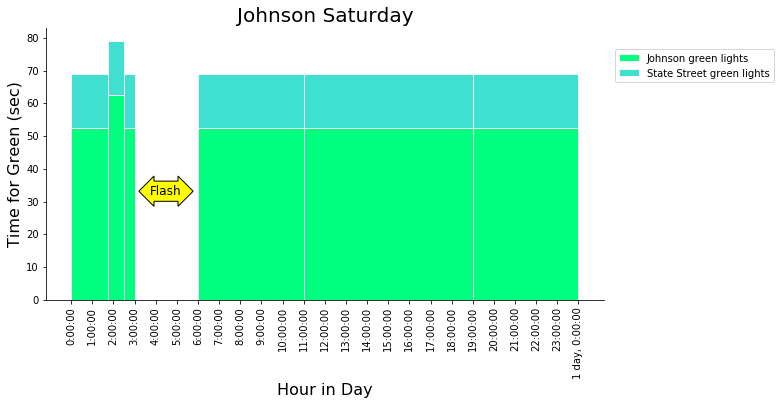

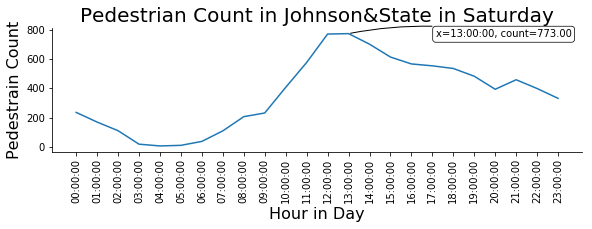

In [34]:
johnson_sat_total, johnson_sat_seconds, modify_johnson_green_main_sat, modify_johnson_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_sat)

lights_ped2(johnson_sat_seconds, modify_johnson_green_main_sat, modify_johnson_green_cross_sat, "Johnson Saturday",
           johnson_sat_total, "Pedestrian Count in Johnson&State in Saturday", 
          "Johnson green lights", "State Street green lights", 0.215, 0.4, 12)

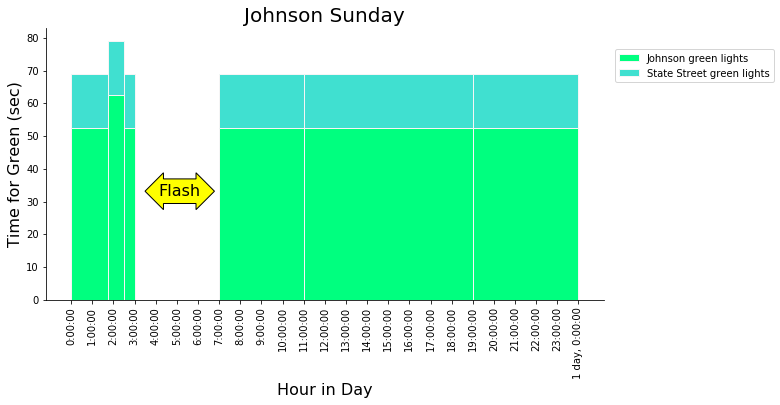

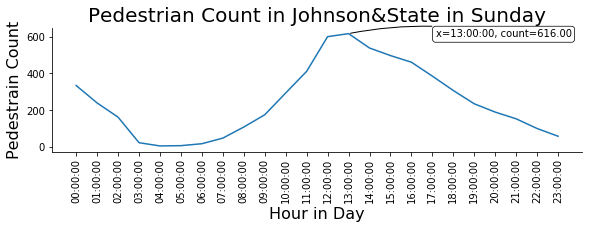

In [35]:
johnson_sun_total, johnson_sun_seconds, modify_johnson_green_main_sun, modify_johnson_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "F200_State_St____Goodman_s", "F200_State_St____Art_Center", Johnson_sun)

lights_ped2(johnson_sun_seconds, modify_johnson_green_main_sun, modify_johnson_green_cross_sun, "Johnson Sunday",
           johnson_sun_total, "Pedestrian Count in Johnson&State in Sunday", 
          "Johnson green lights", "State Street green lights", 0.24, 0.4, 16)

### Gorham/State St

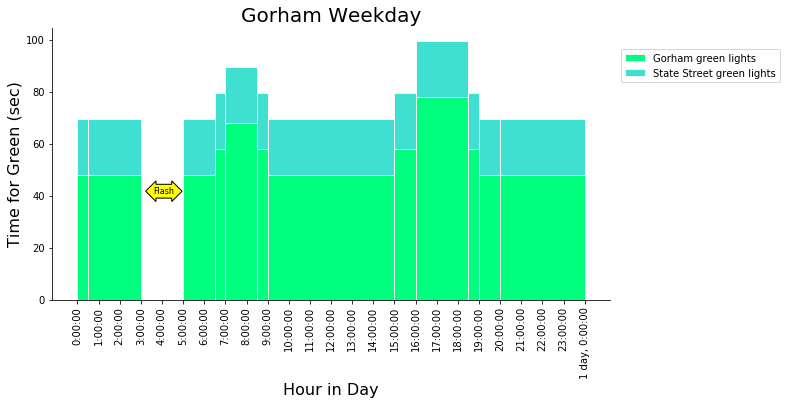

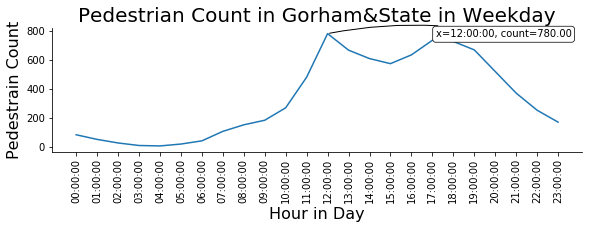

In [36]:
gorham_wkd_total, gorham_wkd_seconds, modify_gorham_green_main_wkd, modify_gorham_green_cross_wkd = \
    preprocess_ped_lights(ped_wkd, "F341_State_St_", "F344_State_St_", Gorham_wkd)

lights_ped2(gorham_wkd_seconds, modify_gorham_green_main_wkd, modify_gorham_green_cross_wkd, "Gorham Weekday",
           gorham_wkd_total, "Pedestrian Count in Gorham&State in Weekday", 
          "Gorham green lights", "State Street green lights", 0.2, 0.4, size=8)

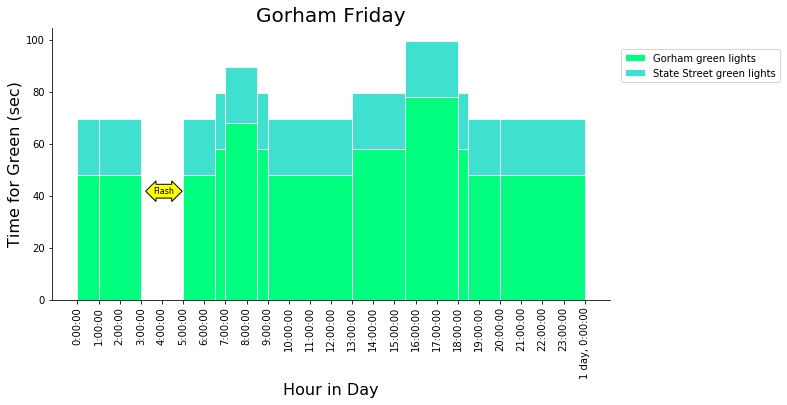

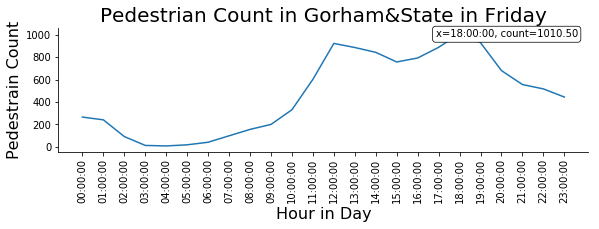

In [37]:
gorham_fri_total, gorham_fri_seconds, modify_gorham_green_main_fri, modify_gorham_green_cross_fri = \
    preprocess_ped_lights(ped_fri, "F341_State_St_", "F344_State_St_", Gorham_fri)

lights_ped2(gorham_fri_seconds, modify_gorham_green_main_fri, modify_gorham_green_cross_fri, "Gorham Friday",
           gorham_fri_total, "Pedestrian Count in Gorham&State in Friday", 
          "Gorham green lights", "State Street green lights", 0.2, 0.4, size=8)

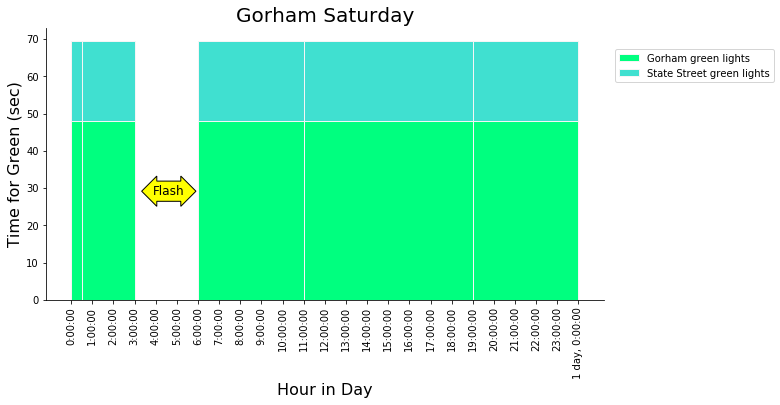

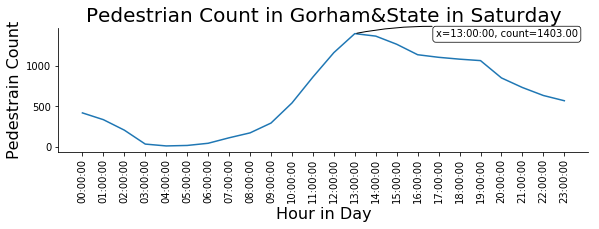

In [38]:
gorham_sat_total, gorham_sat_seconds, modify_gorham_green_main_sat, modify_gorham_green_cross_sat = \
    preprocess_ped_lights(ped_sat, "F341_State_St_", "F344_State_St_", Gorham_sat)

lights_ped2(gorham_sat_seconds, modify_gorham_green_main_sat, modify_gorham_green_cross_sat, "Gorham Saturday",
           gorham_sat_total, "Pedestrian Count in Gorham&State in Saturday", 
          "Gorham green lights", "State Street green lights", 0.22, 0.4, size=12)

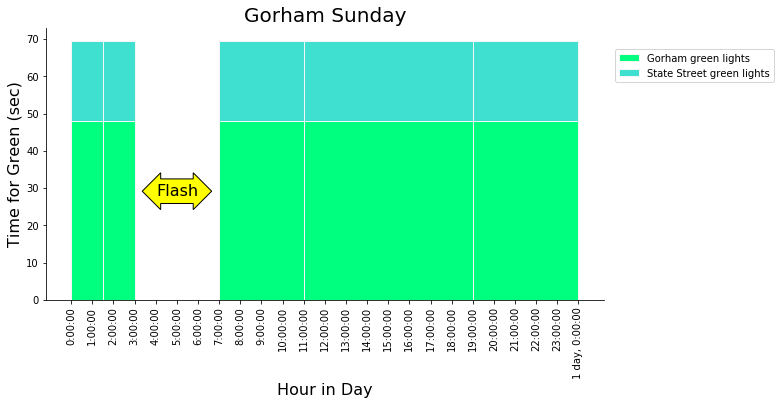

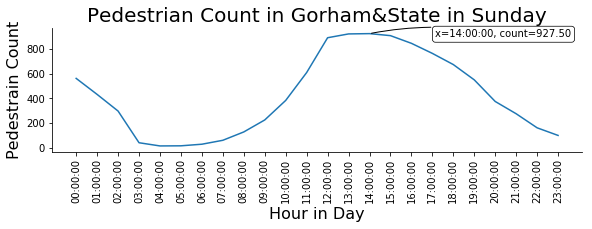

In [39]:
gorham_sun_total, gorham_sun_seconds, modify_gorham_green_main_sun, modify_gorham_green_cross_sun = \
    preprocess_ped_lights(ped_sun, "F341_State_St_", "F344_State_St_", Gorham_sun)

lights_ped2(gorham_sun_seconds, modify_gorham_green_main_sun, modify_gorham_green_cross_sun, "Gorham Sunday",
           gorham_sun_total, "Pedestrian Count in Gorham&State in Sunday", 
          "Gorham green lights", "State Street green lights", 0.235, 0.4, size=16)

1. We can consider adopting the same traffic lights pattern on Saturday and Sunday. 

The Pedestrian Count have only one peak around 12 pm - 1 pm on both Saturday and Sunday. However, there are two peaks, one around 12 pm and the other around 6 pm, from Monday to Friday. It can be explained by the commuting. 

2. More people walk at  and on Saturday noon. (an intuitive conclusion)

We can easily see the trends from the plots. The number of people who walk on Saturday is almost as twice large as the number who walk on weekday (From Monday to Thursday). The number for Friday and Sunday are only 1/3 larger than the number on weekday. 

3. Trends do not align with the traffic lights. 

Traffic lights may favor cars instead of pedestrian. Need cars data. Need further investigation. 

## Green Lights Cycle

In [40]:
pattern_list = ['Pattern', 'Total Cycle Time (s)',
                'Main Street Red (s)', 'Main Street Yellow (s)', 'Main Street Green (s)', 'Main Street Total Cycle Time (s)',
                'Cross Street Red (s)', 'Cross Street Yellow (s)', 'Cross Street Green (s)', 'Cross Street Total Cycle Time (s)']

In [41]:
def constructArr(pat_name, df1, df2=None, df3=None, df4=None):
    length = len(pat_name)/2
    assert length <= 4
    if length == 2:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    elif length == 3:
        assert (df2 is not None)&(df3 is None)&(df4 is None)
    else:
        assert (df2 is not None)&(df3 is not None)&(df4 is not None)  
    
    if length == 2:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33]
    elif length == 4:
        data = np.array([[float(df1["Main Street Red (s)"]), float(df1['Cross Street Red (s)']), 
                  float(df2["Main Street Red (s)"]), float(df2['Cross Street Red (s)']), 
                    float(df3["Main Street Red (s)"]), float(df3['Cross Street Red (s)']), 
                  float(df4["Main Street Red (s)"]), float(df4['Cross Street Red (s)'])], 
                 [float(df1["Main Street Yellow (s)"]), float(df1['Cross Street Yellow (s)']), 
                  float(df2["Main Street Yellow (s)"]), float(df2['Cross Street Yellow (s)']),
                 float(df3["Main Street Yellow (s)"]), float(df3['Cross Street Yellow (s)']), 
                  float(df4["Main Street Yellow (s)"]), float(df4['Cross Street Yellow (s)'])],
                [float(df1["Main Street Green (s)"]), float(df1['Cross Street Green (s)']), 
                 float(df2["Main Street Green (s)"]), float(df2['Cross Street Green (s)']),
                float(df3["Main Street Green (s)"]), float(df3['Cross Street Green (s)']), 
                 float(df4["Main Street Green (s)"]), float(df4['Cross Street Green (s)'])]])
        
        percentages = np.array([
                        [float(df1["Main Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Main Street Green (s)"]/df1['Total Cycle Time (s)'])*100], 
                        [float(df1["Cross Street Red (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Yellow (s)"]/df1['Total Cycle Time (s)'])*100, 
                         float(df1["Cross Street Green (s)"]/df1['Total Cycle Time (s)'])*100],
                       [float(df2["Main Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Main Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df2["Cross Street Red (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Yellow (s)"]/df2['Total Cycle Time (s)'])*100, 
                         float(df2["Cross Street Green (s)"]/df2['Total Cycle Time (s)'])*100], 
                        [float(df3["Main Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Main Street Green (s)"]/df3['Total Cycle Time (s)'])*100], 
                        [float(df3["Cross Street Red (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Yellow (s)"]/df3['Total Cycle Time (s)'])*100, 
                         float(df3["Cross Street Green (s)"]/df3['Total Cycle Time (s)'])*100],
                       [float(df4["Main Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Main Street Green (s)"]/df4['Total Cycle Time (s)'])*100], 
                        [float(df4["Cross Street Red (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Yellow (s)"]/df4['Total Cycle Time (s)'])*100, 
                         float(df4["Cross Street Green (s)"]/df4['Total Cycle Time (s)'])*100]
                       ])
        y_pos = [0, 0.08, 0.25, 0.33, 0.5, 0.58, 0.75, 0.83]
        
    return data, percentages, y_pos

In [42]:
def visPattern(pat_name, data, percentages, xlab, title, y_pos, figsize):
    segments = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    colors1 =['red', 'yellow', 'green']
    patch_handles = []
    left = np.zeros(len(pat_name)) # left alignment of data starts at zero

    for i, d in enumerate(data):
        patch_handles.append(ax.barh(y=y_pos, width=d, height=0.05, left=left, color=colors1[i], align='center'))
        # accumulate the left-hand offsets
        left += d

    # go through all of the bar segments and annotate
    for j in range(len(patch_handles)):
        for i, patch in enumerate(patch_handles[j].get_children()):
            bl = patch.get_xy()
            x = 0.5*patch.get_width() + bl[0]
            y = 0.5*patch.get_height() + bl[1]
            ax.text(x,y, "%.1f%%" % (percentages[i,j]), ha='center')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(pat_name)
    ax.set_xlabel(xlab)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

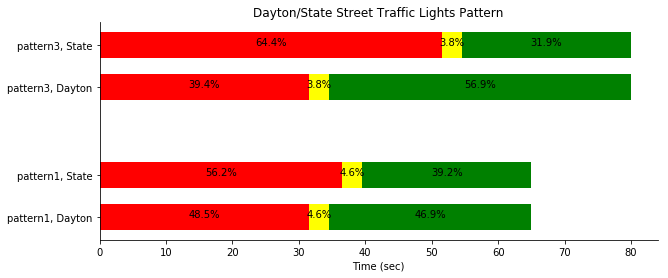

In [43]:
Dayton_cycle = patterns[patterns['Intersection'] == 'State and Dayton']
Dayton_cycle = Dayton_cycle[pattern_list]
Dayton_cycle['Main Street Red (s)'] +=  Dayton_cycle['Cross Street Total Cycle Time (s)']
Dayton_cycle['Cross Street Red (s)'] += Dayton_cycle['Main Street Total Cycle Time (s)']
Dayton_pat = ('pattern1, Dayton', 'pattern1, State', 'pattern3, Dayton', 'pattern3, State')
dayton_data, dayton_pctg, dayton_y = constructArr(Dayton_pat, Dayton_cycle[Dayton_cycle['Pattern'] == 1], 
                                                 Dayton_cycle[Dayton_cycle['Pattern'] == 3])
visPattern(Dayton_pat, dayton_data, dayton_pctg, 'Time (sec)', 
           "Dayton/State Street Traffic Lights Pattern", dayton_y, (10,4) )

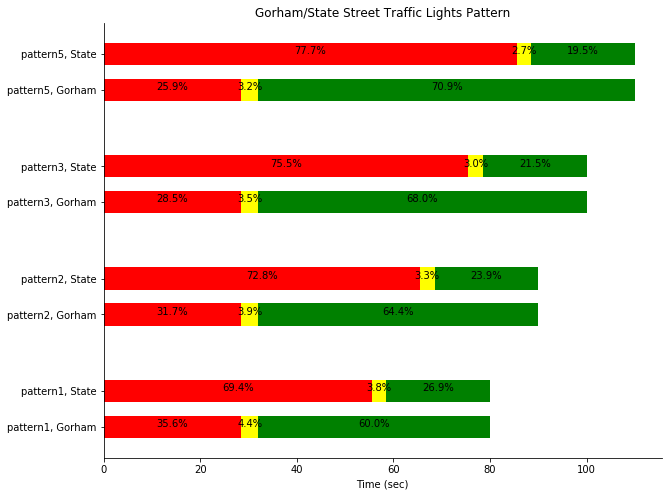

In [44]:
Gorham_cycle = patterns[patterns['Intersection'] == 'State and Gorham']
Gorham_cycle = Gorham_cycle[pattern_list]
Gorham_cycle['Main Street Red (s)'] +=  Gorham_cycle['Cross Street Total Cycle Time (s)']
Gorham_cycle['Cross Street Red (s)'] += Gorham_cycle['Main Street Total Cycle Time (s)']
Gorham_pat = ('pattern1, Gorham', 'pattern1, State', 
              'pattern2, Gorham', 'pattern2, State', 
              'pattern3, Gorham', 'pattern3, State', 
              'pattern5, Gorham', 'pattern5, State')
gorham_data, gorham_pctg, gorham_y = constructArr(Gorham_pat, Gorham_cycle[Gorham_cycle['Pattern'] == 1], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 2], 
                                                  Gorham_cycle[Gorham_cycle['Pattern'] == 3], 
                                                 Gorham_cycle[Gorham_cycle['Pattern'] == 5])
visPattern(Gorham_pat, gorham_data, gorham_pctg, 'Time (sec)', 
           "Gorham/State Street Traffic Lights Pattern", gorham_y, (10, 8) )

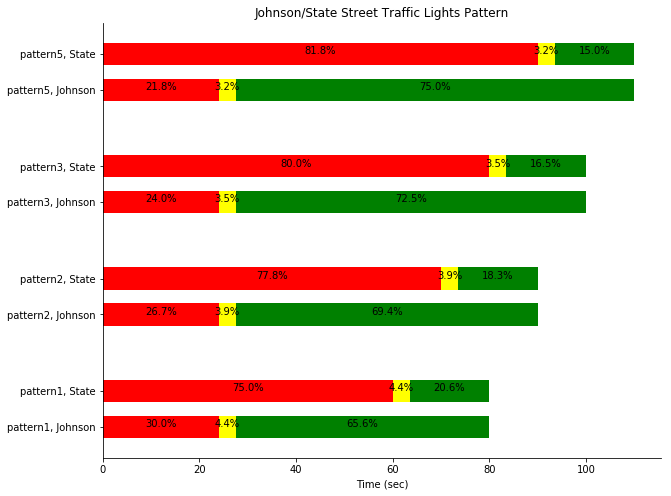

In [45]:
Johnson_cycle = patterns[patterns['Intersection'] == 'State and Johnson']
Johnson_cycle = Johnson_cycle[pattern_list]
Johnson_cycle['Main Street Red (s)'] +=  Johnson_cycle['Cross Street Total Cycle Time (s)']
Johnson_cycle['Cross Street Red (s)'] += Johnson_cycle['Main Street Total Cycle Time (s)']
Johnson_pat = ('pattern1, Johnson', 'pattern1, State', 
              'pattern2, Johnson', 'pattern2, State', 
              'pattern3, Johnson', 'pattern3, State', 
              'pattern5, Johnson', 'pattern5, State')
johnson_data, johnson_pctg, johnson_y = constructArr(Johnson_pat, Johnson_cycle[Johnson_cycle['Pattern'] == 1], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 2], 
                                                  Johnson_cycle[Johnson_cycle['Pattern'] == 3], 
                                                 Johnson_cycle[Johnson_cycle['Pattern'] == 5])
visPattern(Johnson_pat, johnson_data, johnson_pctg, 'Time (sec)', 
           "Johnson/State Street Traffic Lights Pattern", johnson_y, (10, 8) )

For pedestrian to go across State Street (when main street light is green), they do not have to wait for a long time, because the green lights have a relatively large occupation. 
However, for pedestrian to go across Main Street (Dayton, Gorham, or Johnson), they have to wait for a long time. The time they wait is about three to even four times than the other way around. 

## Metric to Measure How Good A Light Cycle is

In [46]:
combined.head()

,Intersection,Day Type,Start Time,Pattern,Main Street,Cross Street,Cycle Offset (s),Total Cycle Time (s),Main Street Total Cycle Time (s),Main Street Red (s),...,Main Street Do Not Walk (s),Main Street Flashing Do Not Walk (s),Main Street Walk (s),Cross Street Total Cycle Time (s),Cross Street Red (s),Cross Street Yellow (s),Cross Street Green (s),Cross Street Do Not Walk (s),Cross Street Flashing Do Not Walk (s),Cross Street Walk (s)
0,State and Dayton,Monday - Thursday,00:30:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State and Dayton,Monday - Thursday,06:00:00,6,Dayton/Fairchild,State,32.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
2,State and Dayton,Monday - Thursday,07:00:00,3,Dayton/Fairchild,State,6.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
3,State and Dayton,Monday - Thursday,09:10:00,1,Dayton/Fairchild,State,30.0,65.0,35.0,1.5,...,4.5,7.0,23.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5
4,State and Dayton,Monday - Thursday,15:30:00,5,Dayton/Fairchild,State,21.0,80.0,50.0,1.5,...,4.5,7.0,38.5,30.0,1.5,3.0,25.5,4.5,12.0,13.5


In [47]:
pedestrian.head()

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,Hour,day_of_week
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1,2018-08-20,08:00:00,Monday
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2,2018-08-24,12:00:00,Friday
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3,2018-08-20,09:00:00,Monday
3,24-08-2018 13:00:00,391,248,370,0,450.0,481.0,4,2018-08-24,13:00:00,Friday
4,24-08-2018 14:00:00,335,212,281,0,337.0,416.0,5,2018-08-24,14:00:00,Friday


In [48]:
wkd_s22_sum = ped_wkd.groupby(ped_wkd.Hour)["SS_22_State_St__North_Side"].sum()
wkd_s22_std = ped_wkd.groupby(ped_wkd.Hour)["SS_22_State_St__North_Side"].std()

wkd_s22_sum.head(), wkd_s22_std.head()

(Hour
 00:00:00    14229
 01:00:00    11208
 02:00:00     7543
 03:00:00     1537
 04:00:00      725
 Name: SS_22_State_St__North_Side, dtype: int64, Hour
 00:00:00    93.760067
 01:00:00    80.825753
 02:00:00    64.994034
 03:00:00    16.244792
 04:00:00     3.357002
 Name: SS_22_State_St__North_Side, dtype: float64)